In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df_voice=pd.read_csv('voice-classification.csv')

In [0]:
df_voice.shape

(3168, 21)

In [0]:
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [0]:
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [0]:
df_voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [0]:
cols=df_voice.columns

In [0]:
for i in cols:
    print(i,df_voice[df_voice[i]==0].count()[0])

meanfreq 0
sd 0
median 0
Q25 0
Q75 0
IQR 0
skew 0
kurt 0
sp.ent 0
sfm 0
mode 236
centroid 0
meanfun 0
minfun 0
maxfun 0
meandom 0
mindom 0
maxdom 0
dfrange 65
modindx 65
label 0


In [0]:
df_voice.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [0]:
df_voice.var()

meanfreq        0.000895
sd              0.000277
median          0.001322
Q25             0.002370
Q75             0.000559
IQR             0.001830
skew           17.982084
kurt        18205.743623
sp.ent          0.002023
sfm             0.031514
mode            0.005960
centroid        0.000895
meanfun         0.001044
minfun          0.000369
maxfun          0.000905
meandom         0.275840
mindom          0.004007
maxdom         12.398544
dfrange        12.390675
modindx         0.014269
dtype: float64

In [0]:
df_voice_orig=pd.read_csv('voice-classification.csv')
df_voice_orig.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [0]:
df_voice_orig[df_voice_orig['label']=='male'].count()[0]

1584

In [0]:
le=LabelEncoder()
le.fit(df_voice['label'])
df_voice['label']=le.transform(df_voice['label'])

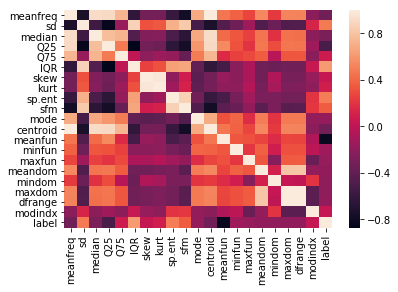

In [0]:
sns.heatmap(df_voice.corr())

#### y-label x-sfm,sp.ent,iqr,sd --> based on the correlation values 

#### sfm is having high variance than sp.ent so we drop sp.ent

#### based on variance and correlation we have choosen 3 features to predict the label('Male','Female')

#### 0-male 1-female

In [0]:
df_voice[df_voice['label']==0].count()[0]

1584

In [0]:
X=df_voice[['sfm','IQR','sd']]
y=df_voice['label']

In [0]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

### KNN

In [0]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
pred=model.predict(X_test)
model.score(X_train,y_train)

0.944794952681388

In [0]:
model.score(X_test,y_test)

0.9159431728492502

In [0]:
mean_squared_error(y_test,pred)

0.0840568271507498

### SVM

In [0]:
model_svc=SVC(kernel="rbf")
model_svc.fit(X_train,y_train)
pred=model_svc.predict(X_test)
model_svc.score(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7949526813880127

In [0]:
model_svc.score(X_test,y_test)

0.7849250197316495

In [0]:
mean_squared_error(y_test,pred)

0.21507498026835042

### Decision Tree

In [0]:
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
pred=model_tree.predict(X_test)
model_tree.score(X_train,y_train)

1.0

In [0]:
model_tree.score(X_test,y_test)

0.8906866614048935

In [0]:
mean_squared_error(y_test,pred)

0.10931333859510656

### Logistic Regression

In [0]:
#6,9,13
X=df_voice[['IQR','sp.ent','meanfun']]
y=df_voice['label']

In [0]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
model_log=LogisticRegression()
model_log.fit(X_train,y_train)
pred=model_log.predict(X_test)
model_log.score(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9022082018927445

In [0]:
model_log.score(X_test,y_test)

0.8804262036306235

In [0]:
mean_squared_error(y_test,pred)

0.11957379636937648

#### selecting feature for logistic regression

In [0]:
from sklearn.feature_selection import RFE

In [0]:
model_log=LogisticRegression()

In [0]:
selector=RFE(model_log,3)

In [0]:
x=df_voice.loc[:,:'modindx']
y=df_voice['label']

In [0]:
x.shape

(3168, 20)

In [0]:
selector=selector.fit(x,y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

In [0]:
selector.support_

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False])

#### 6,9,13 using feature selection

#### selecting feature for svm

In [0]:
model_svc=SVC(kernel="rbf")

In [0]:
selector2=RFE(model_svc,3)

In [0]:
x=df_voice.loc[:,:'modindx']
y=df_voice['label']

In [0]:
selector2=selector2.fit(x,y)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

#### KNN using RFE

In [0]:
model_knn=KNeighborsClassifier(3)

In [0]:
selector3=RFE(model_knn,3)

In [0]:
selector3=selector3.fit(x,y)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

#### decision tree using selector (RFE)

In [0]:
model_dtree=DecisionTreeClassifier()

In [0]:
selector4=RFE(model_dtree,3)

In [0]:
selector4=selector4.fit(x,y)

In [0]:
selector4.support_

In [0]:
6,10,12
df_voice.columns

In [0]:
X=df_voice[['sfm','IQR','centroid']]
y=df_voice['label']

In [0]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
pred=model_tree.predict(X_test)
model_tree.score(X_train,y_train)

1.0

In [0]:
model_tree.score(X_test,y_test)

0.9617205998421468

#### Logistic Regression score after feature selection using RFE - 0.8804262036306235

## ensemble methods

### Bagging 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
ensemble_model=RandomForestClassifier(n_estimators=20,min_samples_split=20,min_impurity_decrease=0.05)

In [0]:
ensemble_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.05, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
print(ensemble_model.score(X_train,y_train),ensemble_model.score(X_test,y_test))

0.9700315457413249 0.9581689029202841


In [0]:
import numpy as np
features=pd.DataFrame(np.array([X.columns,ensemble_model.feature_importances_]).T,columns=["feature","importance"])
features

,feature,importance
0,IQR,0.438764
1,sp.ent,0.156257
2,meanfun,0.404979


1.Logistic Regression score after feature selection using RFE - 0.8804262036306235

2.Logistic Regression score after bagging - 0.8843725335438043

##### concln:ensemble helps in improvising the score 

If you increase the no. of estimators and sample split you might get more accuracy

### Boosting

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
ensemble_boost_model=AdaBoostClassifier(n_estimators=10)


In [0]:
ensemble_boost_model.fit(X_train,y_train)
print(ensemble_boost_model.score(X_train,y_train),ensemble_boost_model.score(X_test,y_test))

0.9747634069400631 0.9581689029202841


3.Logistic regression score after boosting - 0.8977900552486188

##### score is still improved 

### cross validation kfolds

### knn with kfold

In [0]:
from sklearn.model_selection import KFold

In [0]:
k_fold=KFold(n_splits=5,shuffle=False,random_state=40)

In [0]:
k_fold.split(X,y)

<generator object _BaseKFold.split at 0x000001F2925E1B88>

In [0]:
for i,(train,value) in enumerate(k_fold.split(X,y)):
    print(i)
    print('-------------------------------')
    print(X.iloc[train].shape,y.iloc[train].shape)
    print('-------------------------------')
    print(X.iloc[value].shape,y.iloc[value].shape)
    print('-------------------------------')

0
-------------------------------
(2534, 3) (2534,)
-------------------------------
(634, 3) (634,)
-------------------------------
1
-------------------------------
(2534, 3) (2534,)
-------------------------------
(634, 3) (634,)
-------------------------------
2
-------------------------------
(2534, 3) (2534,)
-------------------------------
(634, 3) (634,)
-------------------------------
3
-------------------------------
(2535, 3) (2535,)
-------------------------------
(633, 3) (633,)
-------------------------------
4
-------------------------------
(2535, 3) (2535,)
-------------------------------
(633, 3) (633,)
-------------------------------


In [0]:
model_score_train=[]
model_score_test=[]
for i,(train,value) in enumerate(k_fold.split(X,y)):
    model_knn=KNeighborsClassifier()
    model_knn.fit(X.iloc[train],y.iloc[train])
    pred=model_knn.predict(X.iloc[value])
    model_score_train.append(model_knn.score(X.iloc[train],y.iloc[train]))
    model_score_test.append(model_knn.score(X.iloc[value],y.iloc[value]))
    print(model_knn.score(X.iloc[train],y.iloc[train]),model_knn.score(X.iloc[value],y.iloc[value]))

0.9826361483820047 0.9369085173501577
0.9798737174427782 0.9589905362776026
0.9771112865035517 0.9605678233438486
0.9775147928994082 0.9715639810426541
0.9794871794871794 0.9510268562401264


In [0]:
np.mean(model_score_test)

0.9558115428508778

### decision tree with kfold

In [0]:
model_score_train1=[]
model_score_test1=[]
for i,(train,value) in enumerate(k_fold.split(X,y)):
    model_dtree=DecisionTreeClassifier()
    model_dtree.fit(X.iloc[train],y.iloc[train])
    pred=model_dtree.predict(X.iloc[value])
    model_score_train1.append(model_dtree.score(X.iloc[train],y.iloc[train]))
    model_score_test1.append(model_dtree.score(X.iloc[value],y.iloc[value]))
    print(model_dtree.score(X.iloc[train],y.iloc[train]),model_dtree.score(X.iloc[value],y.iloc[value]))

1.0 0.9274447949526814
1.0 0.9290220820189274
1.0 0.9495268138801262
1.0 0.9399684044233807
1.0 0.9415481832543444


In [0]:
np.mean(model_score_test1)

0.9375015573529485

### svm with kfold 

In [0]:
model_score_train2=[]
model_score_test2=[]
for i,(train,value) in enumerate(k_fold.split(X,y)):
    model_svc=SVC()
    model_svc.fit(X.iloc[train],y.iloc[train])
    pred=model_svc.predict(X.iloc[value])
    model_score_train2.append(model_svc.score(X.iloc[train],y.iloc[train]))
    model_score_test2.append(model_svc.score(X.iloc[value],y.iloc[value]))
    print(model_svc.score(X.iloc[train],y.iloc[train]),model_svc.score(X.iloc[value],y.iloc[value]))

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9108129439621152 0.9637223974763407


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9447513812154696 0.9526813880126183


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.920284135753749 0.8391167192429022


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9108481262327416 0.8151658767772512


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.903353057199211 0.8451816745655608


In [0]:
np.mean(model_score_test2)

0.8831736112149347

### logistic with kfold

In [0]:
model_score_train3=[]
model_score_test3=[]
for i,(train,value) in enumerate(k_fold.split(X,y)):
    model_log=LogisticRegression()
    model_log.fit(X.iloc[train],y.iloc[train])
    pred=model_log.predict(X.iloc[value])
    model_score_train3.append(model_log.score(X.iloc[train],y.iloc[train]))
    model_score_test3.append(model_log.score(X.iloc[value],y.iloc[value]))
    print(model_log.score(X.iloc[train],y.iloc[train]),model_log.score(X.iloc[value],y.iloc[value]))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9100236779794791 0.9274447949526814
0.9234411996842936 0.7539432176656151
0.9218626677190213 0.8485804416403786
0.901775147928994 0.7914691943127962
0.895069033530572 0.8183254344391785


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
np.mean(model_score_test3)

0.82795261660213

In [0]:
df_score=pd.DataFrame(data=[model_score_test3,model_score_test2,model_score_test1,model_score_test],index=["Logistic","SVM","Dtree","KNN"],columns=['s1','s2','s3','s4','s5'])
df_score

,s1,s2,s3,s4,s5
Logistic,0.927445,0.753943,0.848580,0.791469,0.818325
SVM,0.963722,0.952681,0.839117,0.815166,0.845182
Dtree,0.927445,0.929022,0.949527,0.939968,0.941548
KNN,0.936909,0.958991,0.960568,0.971564,0.951027


In [0]:
df_score=df_score.T

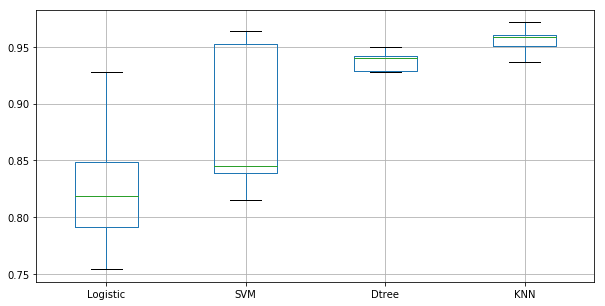

In [0]:
df_score.boxplot(figsize=(10,5))

1.Logistic Regression is properly fitted with the given dataset but test accuracy is less
2.KNN have high accuracy but not properly fitted 

### PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(x)
X_new.shape

(3168, 3)

In [0]:
new_log=LogisticRegression()

In [0]:
new_log.fit(X_new,y)
new_log.score(X_new,y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.680239898989899

In [0]:
pca.score(X_test,y_test)

5.877939214897381

In [0]:
x.var()

meanfreq        0.000895
sd              0.000277
median          0.001322
Q25             0.002370
Q75             0.000559
IQR             0.001830
skew           17.982084
kurt        18205.743623
sp.ent          0.002023
sfm             0.031514
mode            0.005960
centroid        0.000895
meanfun         0.001044
minfun          0.000369
maxfun          0.000905
meandom         0.275840
mindom          0.004007
maxdom         12.398544
dfrange        12.390675
modindx         0.014269
dtype: float64

In [0]:
#amount of variance by each component 
pca.explained_variance_

array([1.82247965e+04, 2.31281069e+01, 7.90584973e-01])

In [0]:
#percentage of variance explained by selected components
pca.explained_variance_ratio_

array([0.99868143])

In [0]:
from sklearn import preprocessing
data_scaled=pd.DataFrame(preprocessing.scale(X),columns=X.columns)

In [0]:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns))

        IQR    sp.ent   meanfun
0 -0.623939 -0.665084  0.410322
1  0.516408 -0.744985 -0.422280
2  0.586535 -0.051583  0.808280


#### pc-1 is sfm pc-2 is IQR pc-3 is centroid

In [0]:
pca.components_

array([[-0.62393869, -0.66508393,  0.41032167],
       [ 0.51640792, -0.74498491, -0.42227994],
       [ 0.58653506, -0.05158343,  0.80827951]])

#### LDA Linear Discriminant Analysis

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [0]:
lda=LDA(n_components=5)

In [0]:
X_new=lda.fit_transform(X_train,y_train)
X_new.shape
#lda.transform(X_test)

(634, 1)

In [0]:
lda.coef_

array([[  59.81575602,  -12.73613587, -181.12891793]])